In [1]:
using DrWatson
@quickactivate "Attitude Control"

In [2]:
include("../src/dynamics.jl")
using Plots
using LinearAlgebra
using DiffEqCallbacks
using ReferenceFrameRotations # for quaternion math

In [3]:
function state_feedback(int)
    # Get parameters and states
    pars = SpacecraftModel.get_parameters(int)
    q, ω = SpacecraftModel.get_states(int)
    
    qₑ = inv(pars.qᵣ * q)
    ωₑ = ω - pars.ωᵣ
    
    e = [imag(qₑ); ωₑ]
    
    # State feedback
    K = 1e-3*[I(3) I(3)] 
    
    # Control output
    u = SpacecraftModel.set_ctrl_torque!(int, -K*e)
    
    # Add to internal momentum
    SpacecraftModel.set_internal_momentum!(int, 
        SpacecraftModel.get_internal_momentum(int) + u * pars.Δt
    )
end

state_feedback (generic function with 1 method)

In [4]:
q₀ = randn(4); q₀ = q₀ / norm(q₀);
ω₀ = randn(3); ω₀ = ω₀ / norm(ω₀) * deg2rad(1);
qᵣ = [0.0; 0.7; 0.0; 0.7]; qᵣ = Quaternion(qᵣ / norm(qᵣ))
ωᵣ = [0; 0; 0]
J = [0.2 0.0 0.0; 0.0 0.2 0.0; 0.0 0.0 0.4]

pars = SpacecraftModel.Parameters(J=J, qᵣ=qᵣ,ωᵣ=ωᵣ)

x₀ = [q₀; ω₀]
sol = SpacecraftModel.run_simulation(x₀, pars, 1500, PeriodicCallback(state_feedback, 1));

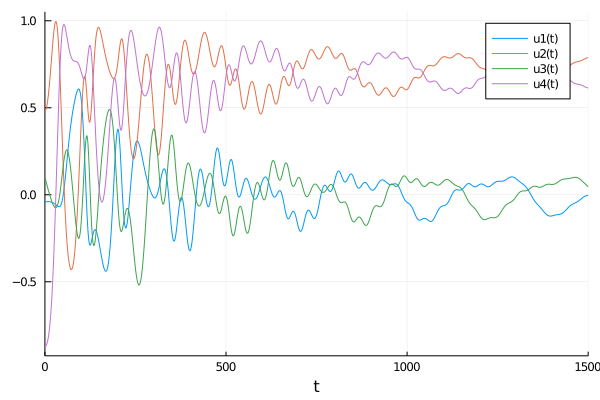

In [5]:
plot(sol, vars=(1:4))

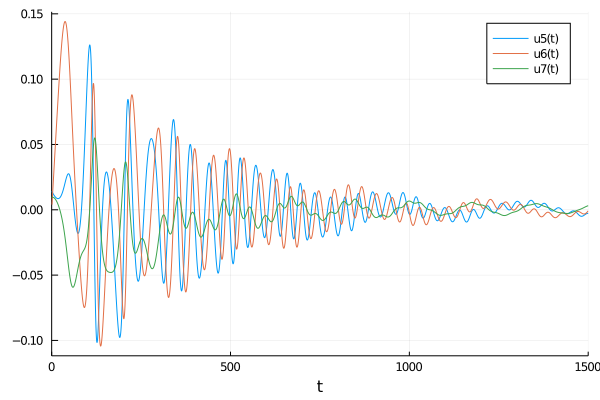

In [6]:
plot(sol, vars=(5:7))